In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/Rohit Srivastava/OneDrive/Desktop/DL dataset/1/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### EDA

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
(data.shape)

(7043, 21)

In [5]:
(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
print("\nUnique values in categorical columns:")
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")


Unique values in categorical columns:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [10]:
print("\nClass distribution of the target variable 'Churn':")
print(data['Churn'].value_counts())


Class distribution of the target variable 'Churn':
No     5174
Yes    1869
Name: Churn, dtype: int64


In [11]:
for feature in categorical_cols:
    churn_service = data.groupby([feature, 'Churn']).size().unstack()
    display(churn_service)
    print('')

Churn,No,Yes
customerID,,
0002-ORFBO,1.0,NaN
0003-MKNFE,1.0,NaN
0004-TLHLJ,NaN,1.0
0011-IGKFF,NaN,1.0
0013-EXCHZ,NaN,1.0
...,...,...
9987-LUTYD,1.0,NaN
9992-RRAMN,NaN,1.0
9992-UJOEL,1.0,NaN


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Churn,No,Yes
TotalCharges,,
,11.0,NaN
100.2,1.0,NaN
100.25,NaN,1.0
100.35,1.0,NaN
100.4,NaN,1.0
...,...,...
997.75,1.0,NaN
998.1,1.0,NaN
999.45,NaN,1.0


Churn,No,Yes
Churn,,
No,5174.0,NaN
Yes,NaN,1869.0


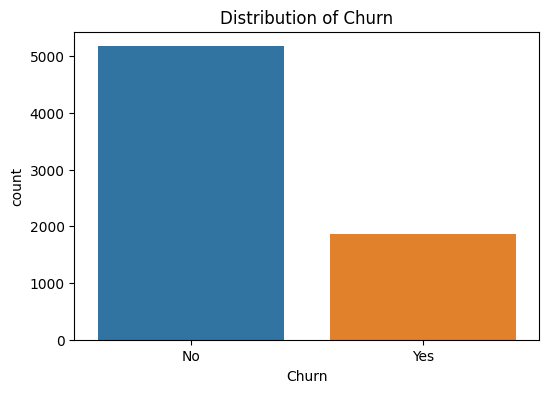

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Distribution of Churn")
plt.show()

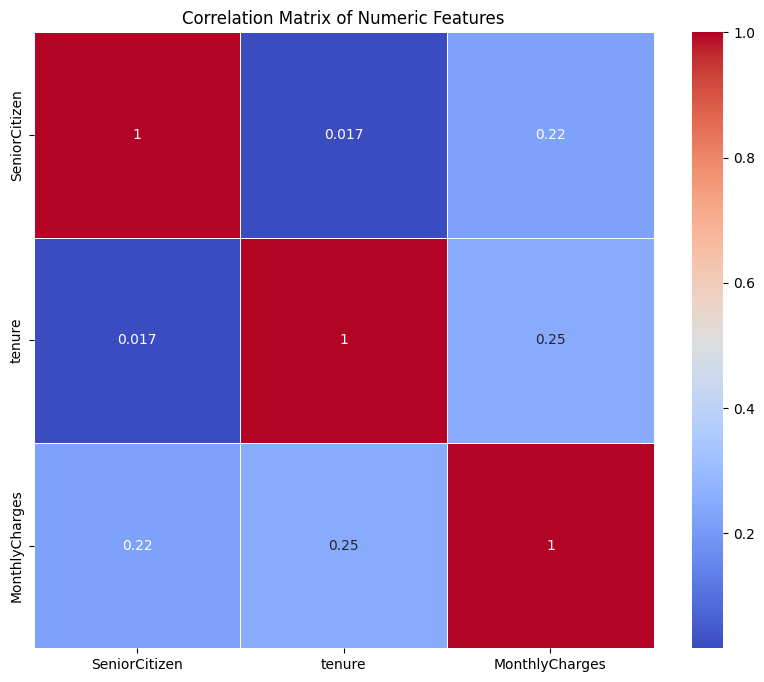

In [13]:
# Visualizing the correlation matrix of numeric features
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

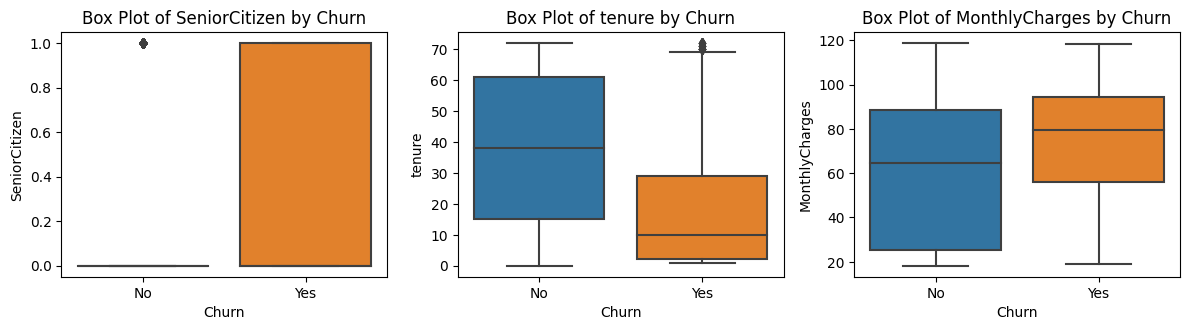

In [14]:
# Box plots for numeric features by Churn
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f"Box Plot of {col} by Churn")
plt.tight_layout()
plt.show()

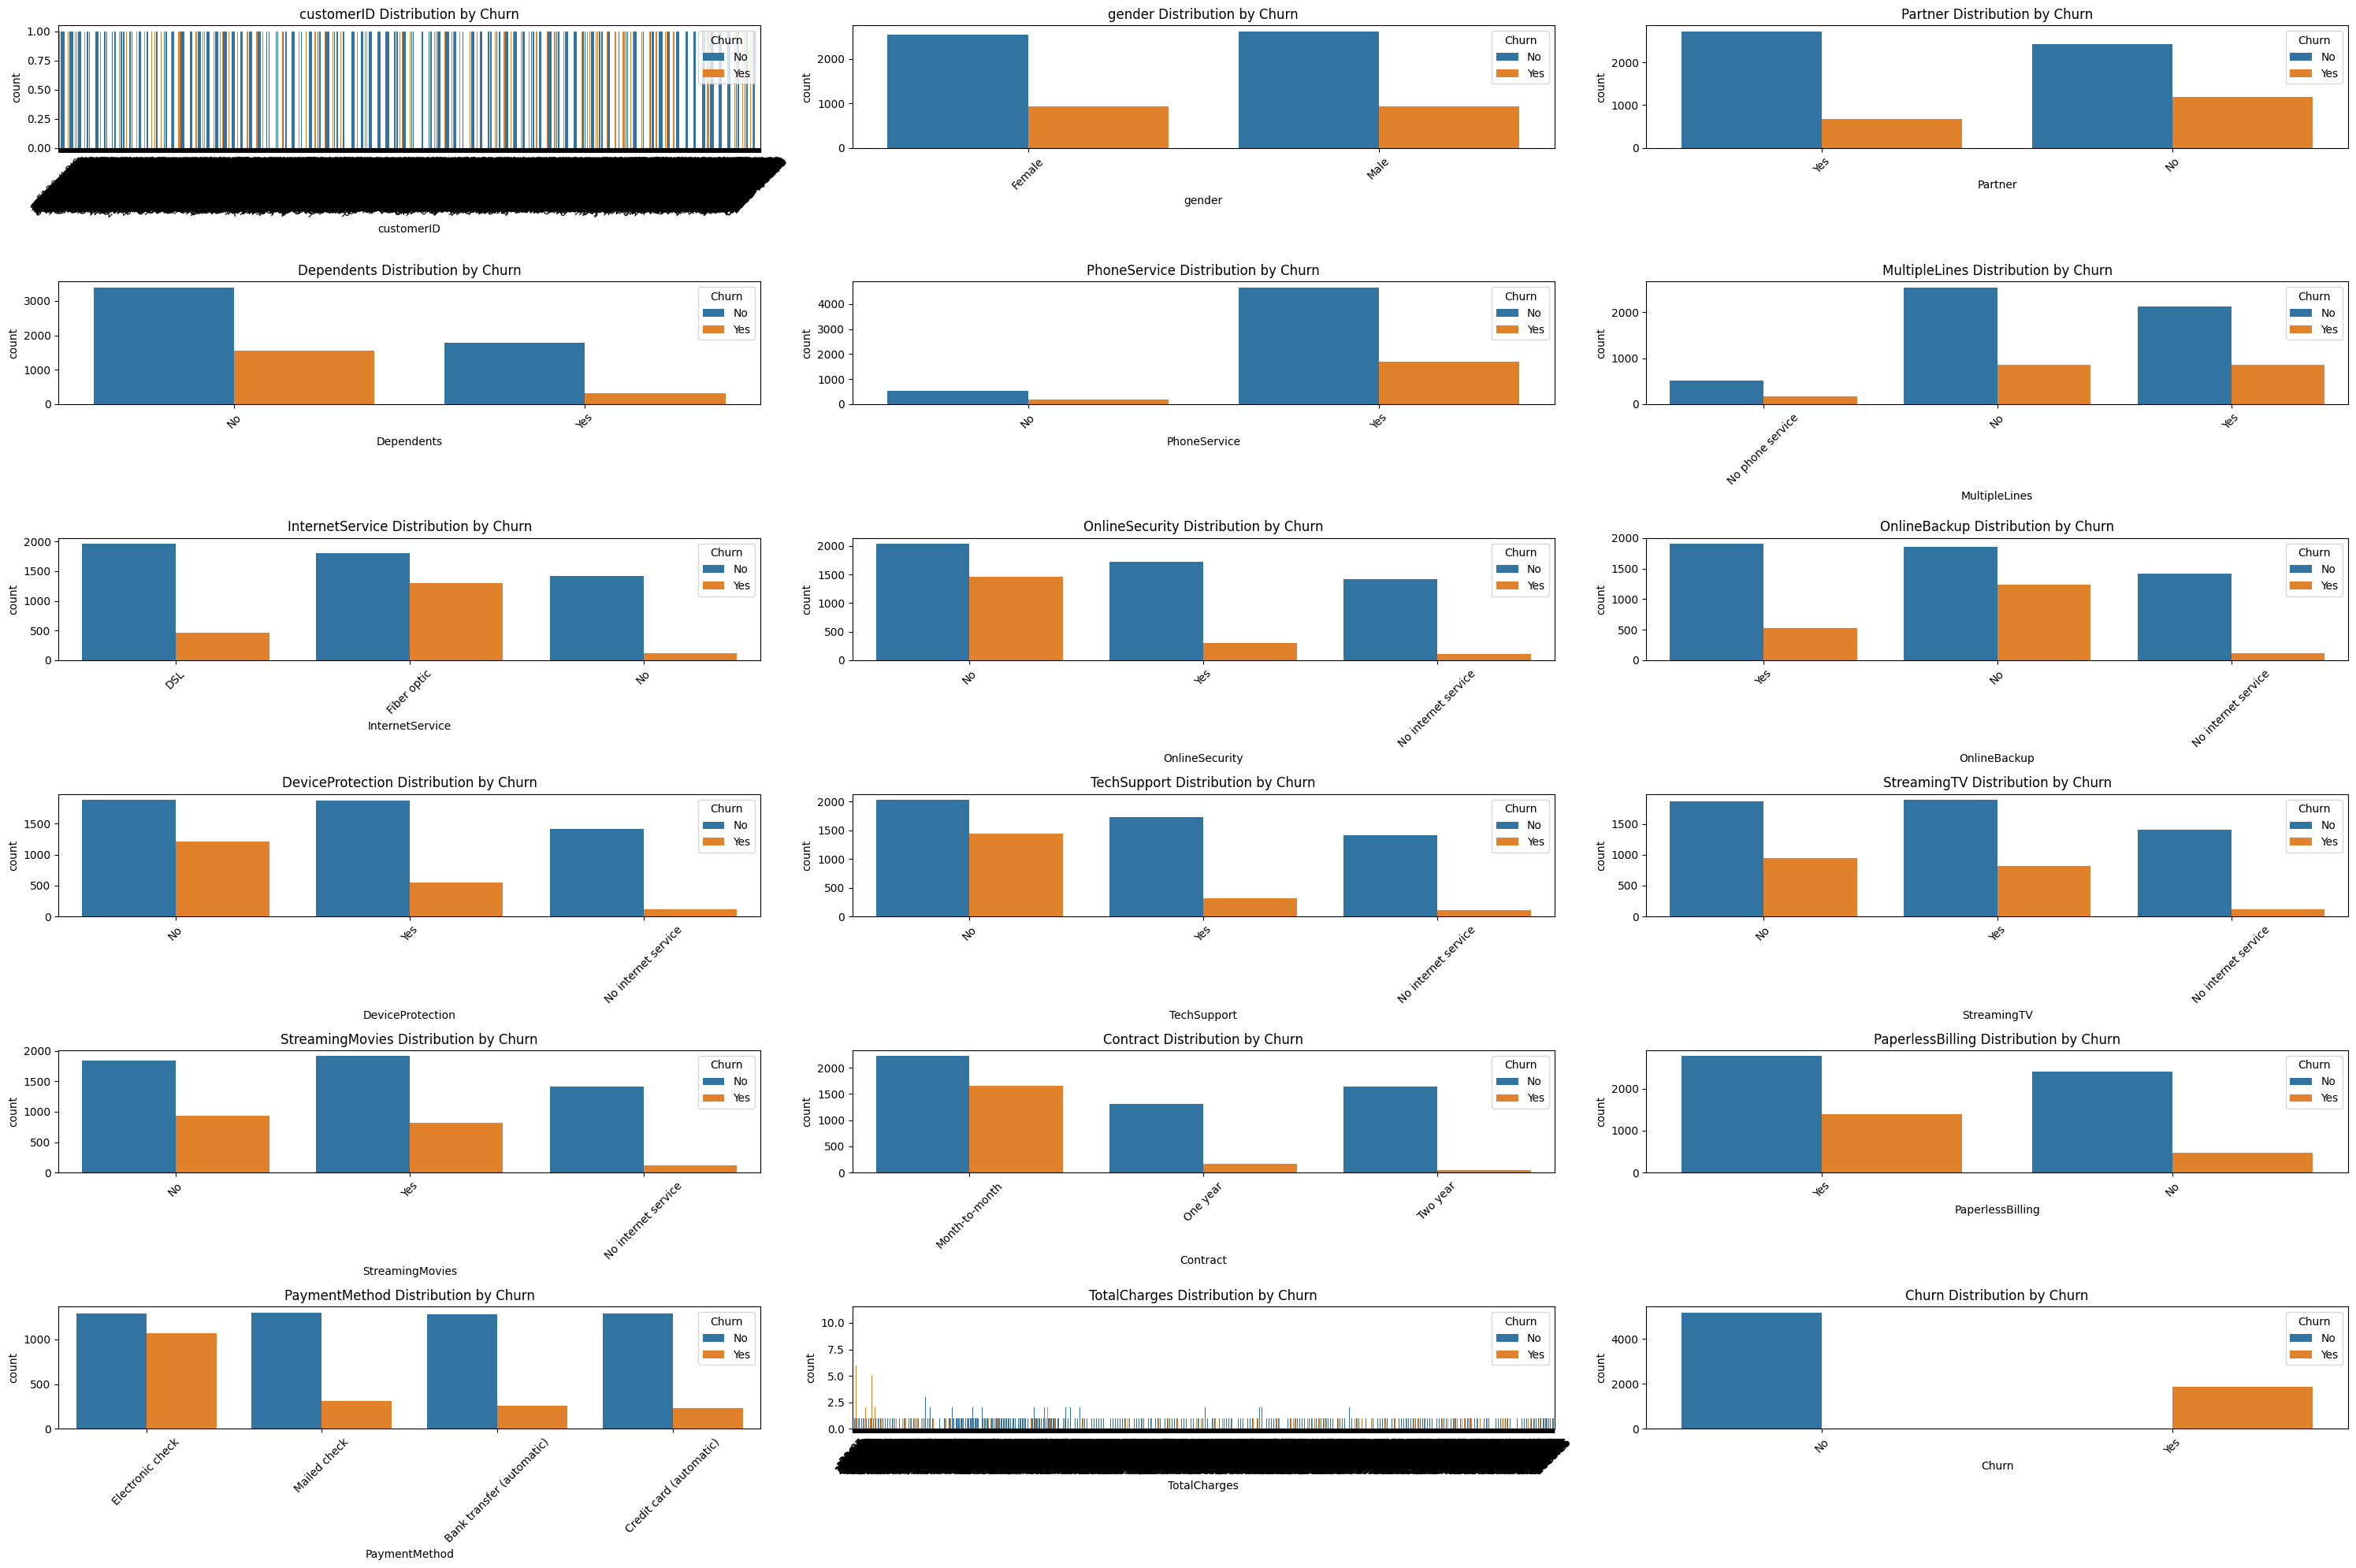

In [15]:
# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns for subplots
num_rows = math.ceil(len(categorical_cols) / num_cols)

plt.figure(figsize=(30, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

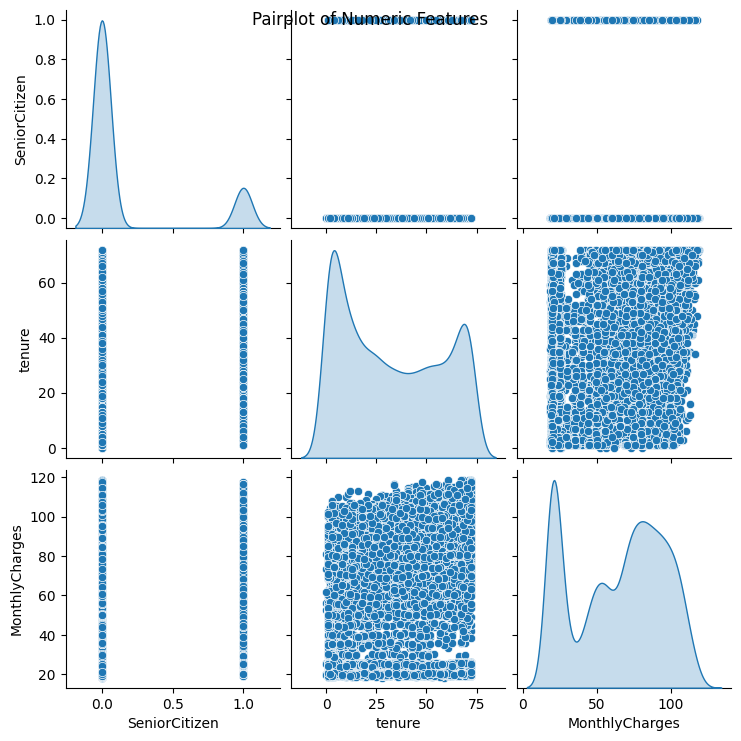

In [16]:
# Pairplot of numeric features (pairwise scatter plots)
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features")
plt.show()

In [17]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [18]:
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
X = data_encoded.drop(columns=['Churn_Yes'])  # Exclude the encoded 'Churn_Yes' column
y = data_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Preprocess the data (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [22]:
# Set input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = 64  # Experiment with different values
output_size = 1   # Binary classification (Churn: Yes/No)

In [23]:
# Create the model, loss function, and optimizer
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [24]:
# Training loop
num_epochs = 50  # Experiment with the number of epochs
for epoch in range(num_epochs):
    inputs = torch.Tensor(X_train).float()
    targets = torch.Tensor(y_train.values).unsqueeze(1).float()
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

In [25]:
# Evaluate the model
with torch.no_grad():
    test_inputs = torch.Tensor(X_test).float()
    predicted = model(test_inputs).round()
    predicted = predicted.numpy()

In [26]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

In [27]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7402413058907026
Precision: 0.5555555555555556
Recall: 0.0938337801608579
F1 Score: 0.1605504587155963


In [28]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [29]:
# Define hyperparameters for experimentation
num_hidden_layers_list = [1, 2, 3]
hidden_size_list = [32, 64, 128]
learning_rate_list = [0.001, 0.01, 0.1]
num_epochs_list = [50, 100, 200]

In [30]:
# Initialize variables to keep track of the best model and its performance
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_model = None
best_hyperparameters = {}

In [31]:
# Loop over different hyperparameter combinations
for num_hidden_layers in num_hidden_layers_list:
    for hidden_size in hidden_size_list:
        for learning_rate in learning_rate_list:
            for num_epochs in num_epochs_list:
                # Create and train the model
                model = NeuralNetwork(input_size=X_train.shape[1], hidden_size=hidden_size,
                                      output_size=1, num_hidden_layers=num_hidden_layers)
                criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                for epoch in range(num_epochs):
                    inputs = torch.Tensor(X_train).float()
                    targets = torch.Tensor(y_train.values).unsqueeze(1).float()

                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    loss.backward()
                    optimizer.step()

                # Evaluate the model
                with torch.no_grad():
                    test_inputs = torch.Tensor(X_test).float()
                    predicted = model(test_inputs).round()
                    predicted = predicted.numpy()

                # Calculate evaluation metrics
                accuracy = accuracy_score(y_test, predicted)
                precision = precision_score(y_test, predicted)
                recall = recall_score(y_test, predicted)
                f1 = f1_score(y_test, predicted)

                print(f"Hyperparameters: Hidden Layers: {num_hidden_layers}, Hidden Size: {hidden_size}, "
                      f"Learning Rate: {learning_rate}, Num Epochs: {num_epochs}")
                print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

                # Check if this model has the best accuracy so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_precision = precision
                    best_recall = recall
                    best_f1 = f1
                    best_model = model
                    best_hyperparameters = {
                        'num_hidden_layers': num_hidden_layers,
                        'hidden_size': hidden_size,
                        'learning_rate': learning_rate,
                        'num_epochs': num_epochs
                    }

# Print the best hyperparameters and corresponding metrics
print("Best Hyperparameters:")
print(best_hyperparameters)
print(f"Best Accuracy: {best_accuracy}, Best Precision: {best_precision}, "
      f"Best Recall: {best_recall}, Best F1 Score: {best_f1}")

Hyperparameters: Hidden Layers: 1, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 50
Accuracy: 0.7437899219304471, Precision: 0.5833333333333334, Recall: 0.1126005361930295, F1 Score: 0.18876404494382024
Hyperparameters: Hidden Layers: 1, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 100
Accuracy: 0.7409510290986515, Precision: 0.5625, Recall: 0.09651474530831099, F1 Score: 0.16475972540045766
Hyperparameters: Hidden Layers: 1, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 200
Accuracy: 0.7395315826827538, Precision: 0.5483870967741935, Recall: 0.09115281501340483, F1 Score: 0.15632183908045977
Hyperparameters: Hidden Layers: 1, Hidden Size: 32, Learning Rate: 0.01, Num Epochs: 50
Accuracy: 0.7409510290986515, Precision: 0.5689655172413793, Recall: 0.08847184986595175, F1 Score: 0.15313225058004643
Hyperparameters: Hidden Layers: 1, Hidden Size: 32, Learning Rate: 0.01, Num Epochs: 100
Accuracy: 0.7409510290986515, Precision: 0.5689655172413793, Recall: 0.0884718498659517

Hyperparameters: Hidden Layers: 2, Hidden Size: 64, Learning Rate: 0.01, Num Epochs: 100
Accuracy: 0.7402413058907026, Precision: 0.5538461538461539, Recall: 0.09651474530831099, F1 Score: 0.1643835616438356
Hyperparameters: Hidden Layers: 2, Hidden Size: 64, Learning Rate: 0.01, Num Epochs: 200
Accuracy: 0.6536550745209369, Precision: 0.4213406292749658, Recall: 0.8257372654155496, F1 Score: 0.5579710144927537


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 50
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 100
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 200
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 50
Accuracy: 0.7785663591199432, Precision: 0.5927051671732523, Recall: 0.5227882037533512, F1 Score: 0.5555555555555556
Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 100
Accuracy: 0.7111426543647977, Precision: 0.4729299363057325, Recall: 0.7962466487935657, F1 Score: 0.5934065934065934
Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 200
Accuracy: 0.7778566359119943, Precision: 0.5974025974025974, Recall: 0.4932975871313673, F1 Score: 0.540381791483113
Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.01, Num Epochs: 50
Accuracy: 0.7388218594748048, Precision: 0.5362318840579711, Recall: 0.09919571045576407, F1 Score: 0.16742081447963802
Hyper

C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 50
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 100
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 2, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 200
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 50
Accuracy: 0.7650816181689141, Precision: 0.6615384615384615, Recall: 0.23056300268096513, F1 Score: 0.34194831013916493
Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 100
Accuracy: 0.7444996451383961, Precision: 0.5915492957746479, Recall: 0.1126005361930295, F1 Score: 0.18918918918918923
Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Num Epochs: 200
Accuracy: 0.7452093683463449, Precision: 0.5972222222222222, Recall: 0.11528150134048257, F1 Score: 0.19325842696629214
Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.01, Num Epochs: 50
Accuracy: 0.7416607523066004, Precision: 0.56, Recall: 0.1126005361930295, F1 Score: 0.18750000000000003
Hyperparameters: 

C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.1, Num Epochs: 100
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.1, Num Epochs: 200
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.001, Num Epochs: 50
Accuracy: 0.7828246983676366, Precision: 0.5949008498583569, Recall: 0.5630026809651475, F1 Score: 0.578512396694215
Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.001, Num Epochs: 100
Accuracy: 0.6401703335699077, Precision: 0.412532637075718, Recall: 0.8471849865951743, F1 Score: 0.5548726953467955
Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.001, Num Epochs: 200
Accuracy: 0.7253371185237757, Precision: 0.48817567567567566, Recall: 0.774798927613941, F1 Score: 0.5989637305699481
Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.01, Num Epochs: 50
Accuracy: 0.6650106458481192, Precision: 0.4309623430962343, Recall: 0.8284182305630027, F1 Score: 0.5669724770642202
Hyperparamet

C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 50
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 100
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.1, Num Epochs: 200
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 50
Accuracy: 0.6792051100070973, Precision: 0.44283646888567296, Recall: 0.8203753351206434, F1 Score: 0.5751879699248121
Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 100
Accuracy: 0.49325762952448543, Precision: 0.33034825870646767, Recall: 0.8900804289544236, F1 Score: 0.48185776487663273
Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.001, Num Epochs: 200
Accuracy: 0.5585521646557843, Precision: 0.36303630363036304, Recall: 0.8847184986595175, F1 Score: 0.514820592823713
Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.01, Num Epochs: 50
Accuracy: 0.6337828246983677, Precision: 0.40774193548387094, Recall: 0.8471849865951743, F1 Score: 0.5505226480836236
H

C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 50
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 100
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Hyperparameters: Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.1, Num Epochs: 200
Accuracy: 0.7352732434350603, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Best Hyperparameters:
{'num_hidden_layers': 3, 'hidden_size': 64, 'learning_rate': 0.001, 'num_epochs': 50}
Best Accuracy: 0.7828246983676366, Best Precision: 0.5949008498583569, Best Recall: 0.5630026809651475, Best F1 Score: 0.578512396694215


C:\Users\Rohit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [32]:
# Report the best model and its performance
print("\nBest Model:")
print(best_model)
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best F1 Score: {best_f1}")


Best Model:
NeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=13601, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
  )
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
Best Accuracy: 0.7828246983676366
Best Precision: 0.5949008498583569
Best Recall: 0.5630026809651475
Best F1 Score: 0.578512396694215
